In [1]:
import numpy as np
import random

In [2]:
def load_data_from_file(file_path):
  data= np.genfromtxt(file_path,skip_header=1,delimiter=",",dtype=None)
  x_features = data[:,:3]
  y_labels = data[:,3:]
  x_features = np.hstack((np.ones((x_features.shape[0],1)),x_features))
  return x_features,y_labels
X,Y = load_data_from_file("advertising.csv")


In [3]:
# Question 2:
features_X,_ = load_data_from_file("advertising.csv")
print(features_X[:5,:])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [4]:
# Question 3:
_,sales_Y = load_data_from_file("advertising.csv")
print(sales_Y.shape)

(200, 1)


In [5]:
def create_individual(n=4,bound=10):
  individual = [random.uniform(-(bound/2),bound/2) for _ in range(n)]
  return individual
create_individual()

[-2.2428313899308696,
 1.9789007255803508,
 2.1377121171221916,
 -0.7048708777583359]

In [6]:
features_X,sales_Y = load_data_from_file("advertising.csv")
def compute_loss(individual):
  theta = np.array(individual)
  y_hat = np.dot(features_X,theta)
  loss = np.mean((y_hat-sales_Y)**2)
  return loss
def compute_fitness(individual):
  loss = compute_loss(individual)
  return 1/(loss+1)

In [7]:
# Question 4:
features_X , sales_Y = load_data_from_file ("advertising.csv")
individual = [4.09 , 4.82 , 3.10 , 4.02]
fitness_score = compute_fitness( individual )
print ( fitness_score )

1.014222981203215e-06


In [8]:
def crossover(individual1,individual2,crossover_rate=0.9):
  individual1_copy = individual1.copy()
  individual2_copy = individual2.copy()
  for i in range(len(individual1)):
    rand = random.random()
    if rand < crossover_rate:
      individual1_copy[i] = individual2[i]
      individual2_copy[i] = individual1[i]
  return individual1_copy,individual2_copy

In [9]:
individual1 = [4.09 , 4.82 , 3.10 , 4.02]
individual2 = [3.44 , 2.57 , -0.79 , -2.41]
individual1 , individual2 = crossover ( individual1 , individual2 , 2.0)
print (" individual1 : " , individual1 )
print (" individual2 : " , individual2 )

 individual1 :  [3.44, 2.57, -0.79, -2.41]
 individual2 :  [4.09, 4.82, 3.1, 4.02]


In [10]:
def mutate(individual,mutation_rate=0.05):
  individual_copy = individual.copy()
  for i in range(len(individual)):
    rand = random.random()
    if rand < mutation_rate:
      individual_copy[i] = random.uniform(-10,10)
  return individual_copy

In [12]:
# question 6:
before_individual = [4.09,4.82,3.10,4.02]
after_individual = mutate(before_individual,mutation_rate=2.0)
print(before_individual == after_individual)


False


In [13]:
def inittializePopulation(m):
  population = [create_individual() for _ in range(m)]
  return population

In [30]:
def selection(sorted_old_population,m=100):
  index1 = random.randint(0,m-1)
  while True:
    index2 = random.randint(0,m-1)
    if index1 != index2:
      break
  individual_s = sorted_old_population[index1]
  if index2 > index1:
    individual_s = sorted_old_population[index2]
  return individual_s

In [33]:
def create_new_population(old_population,elitism=2,gen=1):
  m = len(old_population)
  sorted_population = sorted(old_population,key=compute_fitness)
  if gen%1 == 0:
    print("Best loss:",compute_loss(sorted_population[m-1]),"with chromsome: ", sorted_population[m-1])
  new_population =[]

  while len(new_population) < m-elitism:
    #selection
    selected_individual = []
    individual_1 = selection(sorted_population,m)
    individual_2 = selection(sorted_population,m)
    # crossover
    individual_t1,individual_t2 = crossover(individual_1,individual_2)
    # mutation
    individual_m1 = mutate(individual_t1)
    individual_m2 = mutate(individual_t2)
    # add to new population
    new_population.append(individual_m1)
    new_population.append(individual_m2)
  for i in sorted_population[m-elitism:]:
    new_population.append(i)
    return new_population, compute_loss(sorted_population[m-1])


In [35]:
# Question 7
individual1 = [4.09 , 4.82 , 3.10 , 4.02]
individual2 = [3.44 , 2.57 , -0.79 , -2.41]
old_population = [ individual1 , individual2 ]
new_population , _ = create_new_population ( old_population , elitism =2 , gen =1)

Best loss: 125375.62399377997 with chromsome:  [3.44, 2.57, -0.79, -2.41]


In [43]:
def run_GA():
  n_generations = 100
  m=600
  features_X,sales_Y = load_data_from_file("advertising.csv")
  losses = []
  population = inittializePopulation(m)
  for i in range(n_generations):
    population,loss = create_new_population(population,2,i)
    losses.append(loss)
  return population,losses

In [44]:
population,losses = run_GA()

Best loss: 341.88013912087075 with chromsome:  [-2.3715508031476507, 0.021938254466549623, -0.5814694787029246, 0.4453576104199728]
Best loss: 1140.720984392634 with chromsome:  [3.667425910244644, 0.034159467803441146, 0.3704430273963233, 0.7953482918829629]
Best loss: 671.9536870894224 with chromsome:  [2.2837006107242885, -0.0682405062319571, 0.3797931448380343, 0.8729122331570416]
Best loss: 114.96875984048741 with chromsome:  [-0.23017833166241886, 0.034159467803441146, 0.46063665324026637, -0.20139781601024787]
Best loss: 256.83912818056757 with chromsome:  [-3.6551543894933314, 0.034159467803441146, 0.3704430273963233, 0.42806540760154466]
Best loss: 555.7672818623828 with chromsome:  [2.510454985074041, -0.0682405062319571, 0.3797931448380343, 0.7953482918829629]
Best loss: 410.7747969194757 with chromsome:  [-6.677241398811155, 0.02118454238144274, 0.900732170743554, 0.26782019835364235]
Best loss: 205.77509339816933 with chromsome:  [2.3576410428111485, -0.053504786949999605,

AttributeError: 'list' object has no attribute 'shape'

Best loss: 1146.8701212171284 with chromsome:  [1.4126523721991244, -0.2612869416517256, 0.6593762123956513, 0.8785596722308187]
Best loss: 1146.8701212171284 with chromsome:  [1.4126523721991244, -0.2612869416517256, 0.6593762123956513, 0.8785596722308187]
Best loss: 316.06057178733386 with chromsome:  [-4.2008172023847905, 0.10672591728640679, -0.7803422103581603, 0.5578445408796293]
Best loss: 316.06057178733386 with chromsome:  [-4.2008172023847905, 0.10672591728640679, -0.7803422103581603, 0.5578445408796293]
Best loss: 316.06057178733386 with chromsome:  [-4.2008172023847905, 0.10672591728640679, -0.7803422103581603, 0.5578445408796293]
Best loss: 316.06057178733386 with chromsome:  [-4.2008172023847905, 0.10672591728640679, -0.7803422103581603, 0.5578445408796293]
Best loss: 316.06057178733386 with chromsome:  [-4.2008172023847905, 0.10672591728640679, -0.7803422103581603, 0.5578445408796293]
Best loss: 293.5288630080872 with chromsome:  [0.634603961222858, 0.10672591728640679, 

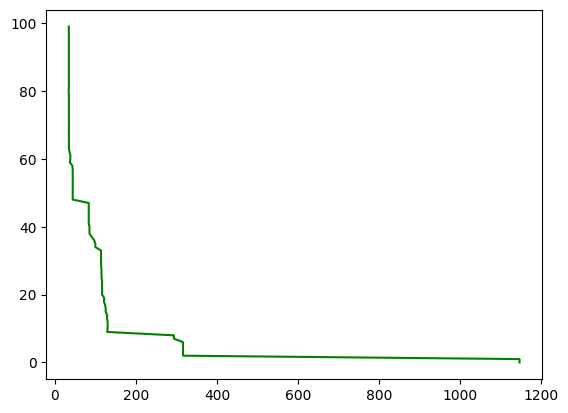

In [47]:
import matplotlib.pyplot as plt

def visualize_loss(losses_list):
  plt.plot(losses_list,[i for i in range(len(losses_list))],color="green")
  plt.show()
_,losses_list = run_GA()
visualize_loss(losses_list)

[9.99611461353841, 0.02118454238144274, 0.07199210558735203, 0.006126002645129525]


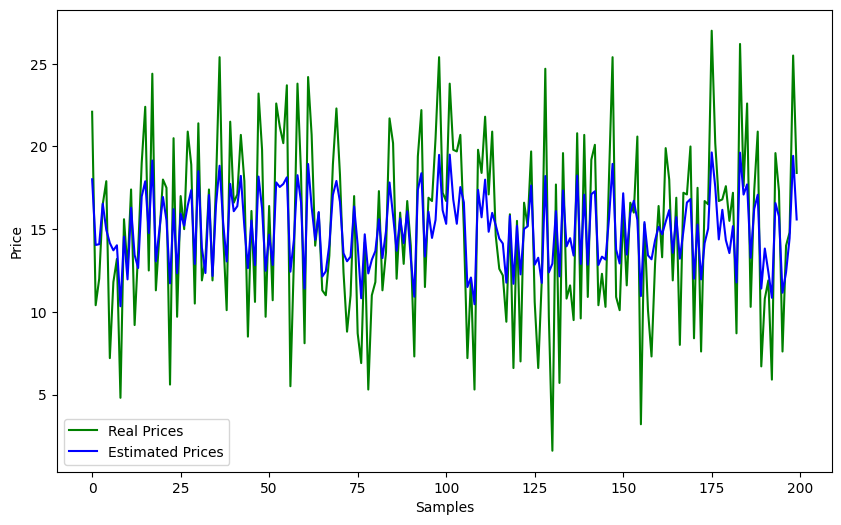

In [48]:
features_X,sales_Y = load_data_from_file("advertising.csv")
def visualize_predict_gt():
  sorted_population = sorted(population,key=compute_fitness)
  print(sorted_population[-1])
  theta = np.array(sorted_population[-1])
  estimated_prices = theta.dot(features_X.T)
  fig,ax = plt.subplots(figsize=(10,6))
  plt.xlabel("Samples")
  plt.ylabel("Price")
  plt.plot(sales_Y,c="green",label="Real Prices")
  plt.plot(estimated_prices,c="blue",label="Estimated Prices")
  plt.legend()
  plt.show()
visualize_predict_gt()

[9.99611461353841, 0.02118454238144274, 0.07199210558735203, 0.006126002645129525]


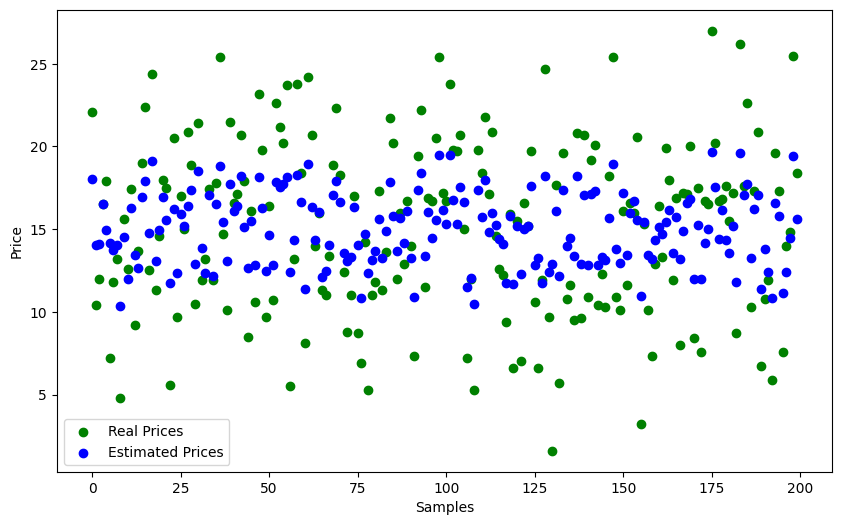

In [51]:
def visualize_predict_gt():
  sorted_population = sorted(population,key=compute_fitness)
  print(sorted_population[-1])
  theta = np.array(sorted_population[-1])
  estimated_prices = theta.dot(features_X.T)
  fig,ax = plt.subplots(figsize=(10,6))
  plt.xlabel("Samples")
  plt.ylabel("Price")
  samples = [i for i in range(estimated_prices.shape[0])]
  plt.scatter(samples,sales_Y,c="green",label="Real Prices")
  plt.scatter(samples,estimated_prices,c="blue",label="Estimated Prices")
  plt.legend()
  plt.show()
visualize_predict_gt()